In [1]:
import pandas as pd
import project4 as pro
import spacy
from spacy.tokenizer import Tokenizer
import re
from nltk.stem import PorterStemmer
import tensorflow as tf

ps = PorterStemmer()

data = pd.DataFrame(pro.play.start())
data.columns  = ['title','detail']
detail_list = [i for i in data['detail']]
nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)
all_tokens = []
tokens = []
for doc in tokenizer.pipe(data['detail']):
    tokens = []
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens = re.sub(r"[^a-z]", "", token.text.lower().strip())
            tokens.append(ps.stem(doc_tokens))
        
    all_tokens.append([i for i in tokens if (i!='') and (len(i)>2)])

data['detail_tokens'] = all_tokens


all_tokens = []
tokens = []
for doc in tokenizer.pipe(data['title']):
    tokens = []
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens = re.sub(r"[^a-z]", "", token.text.lower().strip())
            tokens.append(doc_tokens)
        
    all_tokens.append([i for i in tokens if (i!='') and (len(i)>2)])

data['title_tokens'] = all_tokens

data

,title,detail,detail_tokens,title_tokens
0,A Primer in BERTology What We Know About How B...,APrimerinBERTology:WhatWeKnowAboutHowBERTWorks...,"[aprimerinbertologywhatweknowabouthowbertwork,...","[primer, bertology, know, bert, works]"
1,A Sensitivity Analysis of (and Practitioners’ ...,A Sensitivity Analysis of (and Practitioners' ...,"[sensit, analysi, and, practition, guid, convo...","[sensitivity, analysis, and, practitioners, gu..."
2,attention based models for speech recognition,Attention-Based Models for Speech Recognition\...,"[attentionbas, model, speech, recognit, jan, c...","[attention, based, models, speech, recognition]"
3,attention is all you need,Attention Is All You Need\nAshish Vaswani\n\n...,"[attent, need, ashish, vaswani, googl, brain, ...","[attention, need]"
4,Bag of Tricks for Efficient Text Classification,arXiv:1607.01759v3 [cs.CL] 9 Aug 2016\nBagof...,"[arxivv, cscl, aug, bagoftricksforefcienttextc...","[bag, tricks, efficient, text, classification]"
5,big-self supervised models are strong semi sup...,Big Self-Supervised Models are\nStrong Semi-Su...,"[big, selfsupervis, model, strong, semisupervi...","[bigself, supervised, models, strong, semi, su..."
6,BIRCH an efficient data clustering method for ...,BIRCH:\nAn\nEfficient\nData\nClustering\nMetho...,"[birch, effici, data, cluster, method, larg, d...","[birch, efficient, data, clustering, method, l..."
7,Character-level Convolutional Networks for Tex...,Character-level Convolutional Networks for Tex...,"[characterlevel, convolut, network, text, clas...","[characterlevel, convolutional, networks, text..."
8,Deep Residual Learning for Image Recognition,DeepResidualLearningfor ImageRecognition\nKaim...,"[deepresiduallearningfor, imagerecognit, kaimi...","[deep, residual, learning, image, recognition]"
9,Efficient Convolutional Neural Networks for Mo...,MobileNets: Efcient Convolutional Neural Netw...,"[mobilenet, efcient, convolut, neural, network...","[efficient, convolutional, neural, networks, m..."


<AxesSubplot:xlabel='rank', ylabel='cul_percent'>

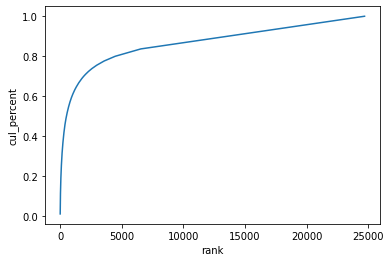

In [2]:
from collections import Counter
import seaborn as sns

def word_count(docs):
    word_counts = Counter()
    word_in_docs = Counter()

    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))
    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['percent'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
    wc['cul_percent'] = wc['percent'].cumsum()

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
    wc = ac.merge(wc, on='word')

    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')


wc = word_count(data['detail_tokens'])
wc = wc[wc['word_in_docs_percent'] >= 0.01]
wc.head(10)
sns.lineplot(x='rank', y='cul_percent', data=wc)

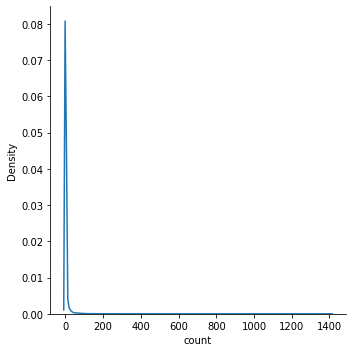

In [3]:
sns.displot(wc['count'],kind='kde')

In [4]:
newline = pd.DataFrame()
detail = []
title = []
for line in data['detail_tokens']:
    detail.append(' '.join(word for word in line))
for line in data['title_tokens']:
    title.append(' '.join(word for word in line))
data['detail'] = detail
data['title'] = title

data = data.drop(['detail_tokens','title_tokens'],axis=1)
data


,title,detail
0,primer bertology know bert works,aprimerinbertologywhatweknowabouthowbertwork a...
1,sensitivity analysis and practitioners guide c...,sensit analysi and practition guid convolut ne...
2,attention based models speech recognition,attentionbas model speech recognit jan chorows...
3,attention need,attent need ashish vaswani googl brain avaswan...
4,bag tricks efficient text classification,arxivv cscl aug bagoftricksforefcienttextclass...
5,bigself supervised models strong semi supervis...,big selfsupervis model strong semisupervis lea...
6,birch efficient data clustering method large d...,birch effici data cluster method larg databas ...
7,characterlevel convolutional networks text cla...,characterlevel convolut network text classic x...
8,deep residual learning image recognition,deepresiduallearningfor imagerecognit kaimingh...
9,efficient convolutional neural networks mobile...,mobilenet efcient convolut neural network mobi...


텍스트의 최소 길이 : 0
텍스트의 최대 길이 : 17043
텍스트의 평균 길이 : 3091.3055555555557
요약의 최소 길이 : 2
요약의 최대 길이 : 10
요약의 평균 길이 : 5.111111111111111


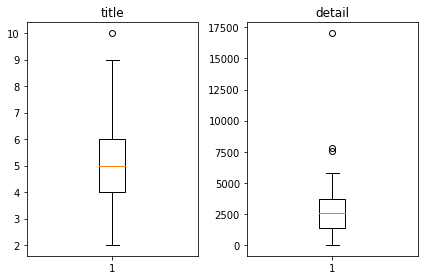

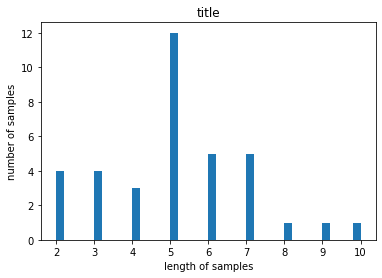

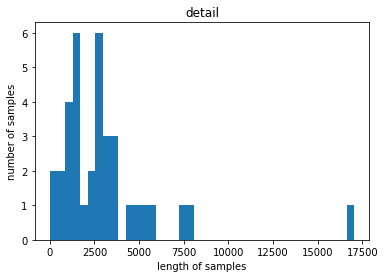

In [5]:
import numpy as np
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['detail']]
summary_len = [len(s.split()) for s in data['title']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(summary_len)
plt.title('title')
plt.subplot(1,2,2)
plt.boxplot(text_len)
plt.title('detail')
plt.tight_layout()
plt.show()

plt.title('title')
plt.hist(summary_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('detail')
plt.hist(text_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

text_max_len = int(np.mean(text_len))
summary_max_len = int(np.mean(summary_len))

In [6]:
data['decoder_input'] = data['title'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['title'].apply(lambda x : x + ' eostoken')
data.head()

,title,detail,decoder_input,decoder_target
0,primer bertology know bert works,aprimerinbertologywhatweknowabouthowbertwork a...,sostoken primer bertology know bert works,primer bertology know bert works eostoken
1,sensitivity analysis and practitioners guide c...,sensit analysi and practition guid convolut ne...,sostoken sensitivity analysis and practitioner...,sensitivity analysis and practitioners guide c...
2,attention based models speech recognition,attentionbas model speech recognit jan chorows...,sostoken attention based models speech recogni...,attention based models speech recognition eost...
3,attention need,attent need ashish vaswani googl brain avaswan...,sostoken attention need,attention need eostoken
4,bag tricks efficient text classification,arxivv cscl aug bagoftricksforefcienttextclass...,sostoken bag tricks efficient text classification,bag tricks efficient text classification eostoken


In [7]:
encoder_input = np.array(data['detail'])
decoder_input = np.array(data['decoder_input'])
decoder_target = np.array(data['decoder_target'])

indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)

encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
n_of_val = int(len(encoder_input)*0.2)

encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

In [9]:
# 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
src_tokenizer = Tokenizer()
src_tokenizer.fit_on_texts(encoder_input_train)

threshold = 4
total_cnt = len(src_tokenizer.word_index)
rare_cnt = 0 
total_freq = 0
rare_freq = 0

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 21194
등장 빈도가 3번 이하인 희귀 단어의 수: 18578
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 2616
단어 집합에서 희귀 단어의 비율: 87.65688402378031
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 28.184036879689057


In [10]:
src_vocab = 8000
src_tokenizer = Tokenizer(num_words = src_vocab) 
src_tokenizer.fit_on_texts(encoder_input_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

In [11]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

tar_vocab = 2000
tar_tokenizer = Tokenizer(num_words = tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

In [12]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]
print('삭제할 훈련 데이터의 개수 :',len(drop_train))
print('삭제할 테스트 데이터의 개수 :',len(drop_test))

삭제할 훈련 데이터의 개수 : 0
삭제할 테스트 데이터의 개수 : 0


In [13]:
encoder_input_train = np.delete(encoder_input_train, drop_train, axis=0)
decoder_input_train = np.delete(decoder_input_train, drop_train, axis=0)
decoder_target_train = np.delete(decoder_target_train, drop_train, axis=0)

encoder_input_test = np.delete(encoder_input_test, drop_test, axis=0)
decoder_input_test = np.delete(decoder_input_test, drop_test, axis=0)
decoder_target_test = np.delete(decoder_target_test, drop_test, axis=0)

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :',len(decoder_input_train))
print('테스트 데이터의 개수 :',len(encoder_input_test))
print('테스트 레이블의 개수 :',len(decoder_input_test))

훈련 데이터의 개수 : 29
훈련 레이블의 개수 : 29
테스트 데이터의 개수 : 7
테스트 레이블의 개수 : 7


In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

encoder_input_train = pad_sequences(encoder_input_train, maxlen = text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen = text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen = summary_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen = summary_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen = summary_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen = summary_max_len, padding='post')

In [15]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from attention import AttentionLayer

In [16]:
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)


In [17]:
# 디코더
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences = True, return_state = True, dropout = 0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state = [state_h, state_c])

In [18]:
# 어텐션 층(어텐션 함수)
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis = -1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3091)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 3091, 128)    1024000     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 3091, 256),  394240      ['embedding[0][0]']              
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                              

In [19]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 2)
history = model.fit(x = [encoder_input_train, decoder_input_train], y = decoder_target_train, \
          validation_data = ([encoder_input_test, decoder_input_test], decoder_target_test),
          batch_size = 256, callbacks=[es], epochs = 50)

Epoch 1/50
1/1 [==============================] - 1581s 1581s/step - loss: 7.6009 - val_loss: 7.5370
Epoch 2/50
1/1 [==============================] - 2022s 2022s/step - loss: 7.5367 - val_loss: 5.5397
Epoch 3/50
1/1 [==============================] - 2158s 2158s/step - loss: 5.7083 - val_loss: 4.0712
Epoch 4/50
1/1 [==============================] - 2171s 2171s/step - loss: 4.2027 - val_loss: 3.4404
Epoch 5/50
1/1 [==============================] - 2661s 2661s/step - loss: 3.7845 - val_loss: 3.4201
Epoch 6/50
1/1 [==============================] - 2724s 2724s/step - loss: 3.7058 - val_loss: 3.4265
Epoch 7/50
1/1 [==============================] - 2545s 2545s/step - loss: 3.7526 - val_loss: 3.1664
Epoch 8/50
1/1 [==============================] - 2885s 2885s/step - loss: 3.5561 - val_loss: 3.3097
Epoch 9/50
1/1 [==============================] - 3052s 3052s/step - loss: 3.5001 - val_loss: 3.1474
Epoch 10/50
1/1 [==============================] - 2953s 2953s/step - loss: 3.4928 - val_lo

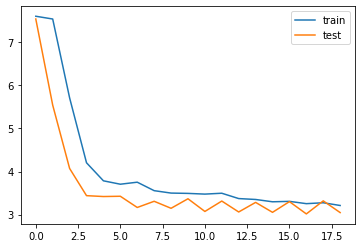

In [20]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [21]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

In [22]:
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])
# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)
# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [23]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if(sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (summary_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

In [24]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    sentence=''
    for i in input_seq:
        if(i!=0):
            sentence = sentence + src_index_to_word[i]+' '
    return sentence

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    sentence=''
    for i in input_seq:
        if((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            sentence = sentence + tar_index_to_word[i] + ' '
    return sentence

In [26]:
for i in range(3):
    print("원문 : ",seq2text(encoder_input_test[i]))
    print("실제 요약문 :",seq2summary(decoder_input_test[i]))
    print("예측 요약문 :",decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 :  given exist translat model qualit analysi show rnn encoderdecod better captur lin guistic regular phrase tabl explain quantit improv overal translat perform anal ysi model rnn encod decod learn continu space represent phrase preserv semant syntact structur phrase arxivv cscl sep rnn encoderdecod preliminari recurr neural network recurr neural network rnn neural net work consist hidden state option output oper variabl length sequenc time step hidden state rnn updat nonlinear activ func tion simpl element logist sigmoid function com long shortterm memori lstm unit hochreit schmidhub rnn learn probabl distribut sequenc train predict symbol sequenc case output condit distribut exampl multinomi distribut code output softmax activ function exp exp possibl symbol row weight matrix combin probabl comput iti sequenc learn distribut ward sampl new sequenc iter sam symbol time step rnn encoderdecod paper propos novel neural network architectur learn encod variablelength sequenc xedlength ve